## How to remotely access NASA GES_DISC THREDDS aggregations, from [example](https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20remotely%20access%20MERRA-2%20with%20Python3%20and%20calculate%20monthly%20average%20surface%20PM2.5%20for%20world%20countries)

### Procedures ###

0. set up permissions using your Earthdata credentials, in home directory: 

    - echo "machine urs.earthdata.nasa.gov login mapes password MapesIDV0" >> .netrc

    - touch .urs_cookies
    
    - add these to .dodsrc  

1. Import libraries, set the working directory, and create a folder to save CSV files:**

In [6]:
import os
from datetime import datetime
import time
import pandas as pd
import numpy as np
import xarray as xr

**2. Read data from the THREDDS server:**

In [7]:
%%time

# URL to remotely access
# NASA THREDDS data server (TDS) URLs
URL1 = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/thredds/dodsC/MERRA2_MONTHLY_aggregation/M2TMNXAER.5.12.4_Aggregation.ncml'

# Read the data 
ds = xr.open_dataset(URL1)
ds

CPU times: user 33.4 ms, sys: 1.75 ms, total: 35.1 ms
Wall time: 33.6 ms


<xarray.Dataset>
Dimensions:        (lon: 576, lat: 361, time: 504)
Coordinates:
  * lon            (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat            (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time           (time) datetime64[ns] 1980-01-01T00:30:00 ... 2021-12-01T0...
Data variables: (12/100)
    BCANGSTR       (time, lat, lon) float32 ...
    BCCMASS        (time, lat, lon) float32 ...
    BCEXTTAU       (time, lat, lon) float32 ...
    BCFLUXU        (time, lat, lon) float32 ...
    BCFLUXV        (time, lat, lon) float32 ...
    BCSCATAU       (time, lat, lon) float32 ...
    ...             ...
    Var_SUFLUXU    (time, lat, lon) float32 ...
    Var_SUFLUXV    (time, lat, lon) float32 ...
    Var_SUSCATAU   (time, lat, lon) float32 ...
    Var_TOTANGSTR  (time, lat, lon) float32 ...
    Var_TOTEXTTAU  (time, lat, lon) float32 ...
    Var_TOTSCATAU  (time, lat, lon) float32 ...
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Sat Dec 18 22...
    Filename:                          MERRA2_400.tavgM_2d_aer_Nx.202111.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p30_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/FH9A0MLJPC7N
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

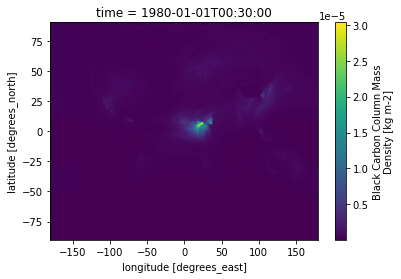

In [10]:
ds.BCCMASS[0].plot()